In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video


resolution = 30 #pixels/micron

freq = 1/1.55 # We work typically at 1550 nm wavelength (1.55 micron)
sio2 = mp.Medium(index=1.444) # glass surrounding waveguide

cell = mp.Vector3(16,8,0)
geometry = [mp.Block(mp.Vector3(mp.inf,0.5,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

# sources = [
#     mp.EigenModeSource(src=mp.ContinuousSource(frequency=freq, width=20),
#         component=mp.Ez,
#         center=mp.Vector3(-4,0),
#         # direction = mp.X,
#         size=mp.Vector3(0,1)                                     
#     )
# ]

# sources = [
#     mp.EigenModeSource(
#         src=mp.GaussianSource(wavelength=2 * (11**0.5), width=10),
#         component=mp.Ez,
#         center=mp.Vector3(-7, -3.5),
#         size=mp.Vector3(0, 1),
#     )
# ]

n = 3.464
th = np.radians(20)

k_point = mp.Vector3(freq * n).rotate(mp.Vector3(z=1), th)


sources = [
    mp.EigenModeSource(
        
        src=mp.GaussianSource(freq,fwidth=0.2*freq, width=2),
            center=mp.Vector3(-6,0),
            size=mp.Vector3(0,1),
            component=mp.Ez,
            direction=mp.NO_DIRECTION,
            eig_kpoint= k_point
    )
]


pml_layers = [mp.PML(1.0)]



/Users/JohnMihal/anaconda3/envs/mp/lib/python3.11/site-packages/meep/source.py:592: RuntimeWarning: EigenModeSource component is not ALL_COMPONENTS (the default), which makes it non-unidirectional.
  warnings.warn(


In [2]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution,
                    default_material=sio2)

fluxEnd = sim.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=5),size=mp.Vector3(y=1)), 
                            decimation_factor=0)

fluxStart = sim.add_mode_monitor(freq, 0, 1, 
                            mp.ModeRegion(center=mp.Vector3(x=-3),size=mp.Vector3(y=1)), 
                            decimation_factor=0)



In [3]:
f = plt.figure(dpi=150)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.5, Animate), until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt=mp.Vector3(x=5), decay_by=1e-2))
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000231028 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 30
     

block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.117172 s
-----------
MPB solved for frequency_1(2.10006,0.76436,0) = 0.687148 after 23 iters
MPB solved for frequency_1(1.95907,0.713042,0) = 0.645184 after 7 iters
MPB solved for frequency_1(1.95899,0.713015,0) = 0.645161 after 3 iters
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
field decay(t = 50.016666666666666): 2.184395102727238e-05 / 2.184395102727238e-05 = 1.0
field decay(t = 100.01666666666667): 0.8526951501313468 / 0.8526951501313468 = 1.0
on time step 6840 (time=114), 0.000585184 s/step
field decay(t = 150.03333333333333): 0.00024322082668926768 / 0.8526951501313468 = 0.0002852377272836636
Normalizing field data...
run 0 finished at t = 150.03333333333333 (9002 timesteps)


In [4]:
filename = "straight_waveguide.mp4"
fps = 10
Animate.to_mp4(fps, filename)
Video(filename)

Generating MP4...


     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)


          dielectric constant epsilon diagonal = (12,12,12)


<Axes: xlabel='X', ylabel='Y'>

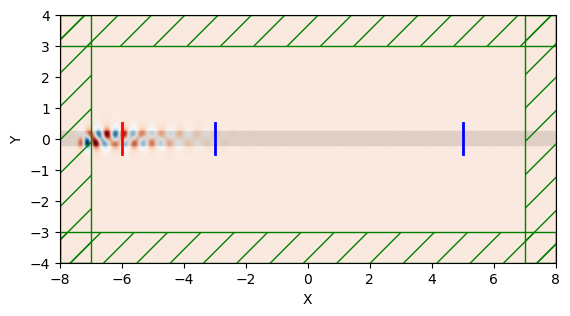

In [5]:
sim.plot2D(fields=mp.Ez, 
           field_parameters={'alpha':0.9})

In [6]:
res = sim.get_eigenmode_coefficients(fluxEnd,bands=[1])

MPB solved for frequency_1(2.2349,0,0) = 0.683463 after 24 iters
MPB solved for frequency_1(2.09819,0,0) = 0.645184 after 7 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 3 iters
MPB solved for frequency_1(2.09811,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (2.098108,-0.000000,0.000000)


In [7]:
t = res.alpha[0][0][0]
np.abs(t)**2

11.79780219134733

In [8]:
mp.get_fluxes(fluxEnd)

[14.916549964902208]

In [9]:
sources[0]

In [10]:
mp.get_fluxes(fluxStart)


[14.95016365433124]